In [1]:
import yfinance as yf
import pandas as pd
from neuralprophet import NeuralProphet
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
stock_symbol = 'GOOGL' #Samsung
start_date = '2015-01-01'
end_date = '2023-01-01'

stock_data = yf.download(stock_symbol, start = start_date, end=end_date)

print(stock_data.head())
stock_data.to_csv('stock_data.csv')

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-01-02  26.629999  26.790001  26.393999  26.477501  26.477501  26480000
2015-01-05  26.357500  26.399500  25.887501  25.973000  25.973000  41182000
2015-01-06  26.025000  26.060499  25.277500  25.332001  25.332001  54456000
2015-01-07  25.547501  25.574499  25.182501  25.257500  25.257500  46918000
2015-01-08  25.075500  25.375000  24.750999  25.345501  25.345501  73054000


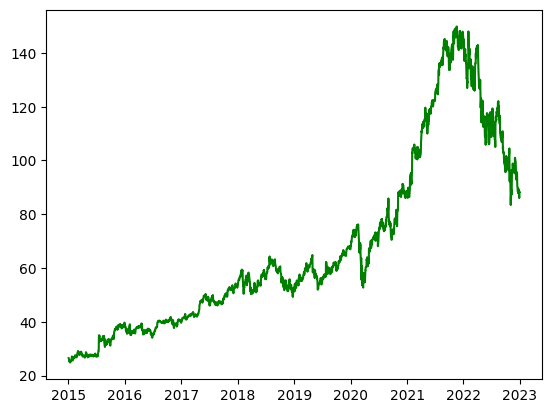

In [3]:
stocks = pd.read_csv('stock_data.csv')
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks = stocks[['Date', 'Close']]
stocks.columns = ['ds', 'y']

plt.plot(stocks['ds'], stocks['y'], label = 'actual', c = 'g')
plt.show()

In [4]:
m = NeuralProphet()
m.fit(stocks, freq='B', epochs=100)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.375% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (py.warnings._showwarnmsg) - /Users/jonathanhofmann/Desktop/programming/arima-practice/arima/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder:

Finding best initial lr:   0%|          | 0/233 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,138.327057,161.792648,0.823195,0.0,0
1,74.497429,93.896538,0.394186,0.0,1
2,30.567844,37.766514,0.111128,0.0,2
3,17.773495,21.500584,0.042078,0.0,3
4,15.106564,18.337912,0.032631,0.0,4
...,...,...,...,...,...
95,7.316942,11.025702,0.015307,0.0,95
96,7.286537,11.070378,0.015245,0.0,96
97,7.243894,11.014341,0.015208,0.0,97
98,7.249254,10.977219,0.015220,0.0,98


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.375% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B


Predicting: 63it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.375% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.375% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B


Predicting: 63it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


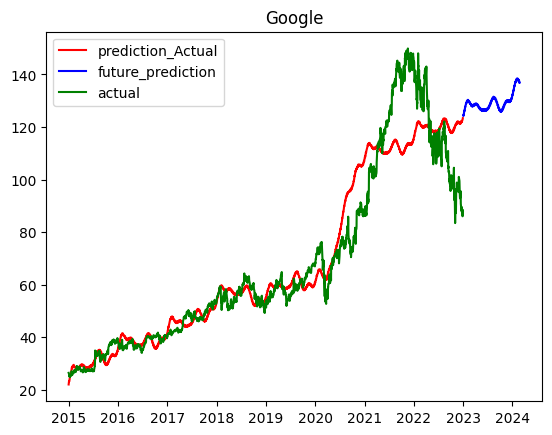

In [6]:
future = m.make_future_dataframe(stocks, periods = 300)

forecast = m.predict(future)
actual_prediction = m.predict(stocks)

plt.plot(actual_prediction['ds'], actual_prediction['yhat1'], label = "prediction_Actual", c = 'r')
plt.plot(forecast['ds'], forecast['yhat1'], label = 'future_prediction', c = 'b')
plt.plot(stocks['ds'], stocks['y'], label = 'actual', c = 'g')
plt.legend()
plt.title('Google')
plt.show()

In [1]:
m.plot_components(forecast)

NameError: name 'm' is not defined